## Import Data

In [10]:
import pandas as pd
import numpy as np

data = pd.read_csv("../data/combine_data.csv")
data.head()

,Unnamed: 0,Country,year,Happiness Score,Log GDP per capita,Social support,Health,Freedom to make life choices,Generosity,Corruption,...,Negative affect,Confidence in national government,continent,Country Code,Time Code,CO2 emissions,Population,Unemployment,Children out of school,Adjusted net national income
0,0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,...,0.258195,0.612072,Asia,AFG,YR2008,3559.999943,26427199.0,2.49,NaN,NaN
1,1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,...,0.237092,0.611545,Asia,AFG,YR2009,4880.000114,27385307.0,NaN,NaN,1.129747e+10
2,2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,...,0.275324,0.299357,Asia,AFG,YR2010,7110.000134,28189672.0,NaN,NaN,1.448363e+10
3,3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,...,0.267175,0.307386,Asia,AFG,YR2011,8930.000305,29249157.0,NaN,NaN,1.626732e+10
4,4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,...,0.267919,0.435440,Asia,AFG,YR2012,8079.999924,30466479.0,1.69,NaN,1.822551e+10


In [2]:
# summary of happiness score
data['Happiness Score'].describe()

count    1648.000000
mean        5.524484
std         1.134368
min         2.178809
25%         4.658249
50%         5.478749
75%         6.377864
max         7.970892
Name: Happiness Score, dtype: float64

Text(0.5, 1.0, 'Histogram of Happiness Score')

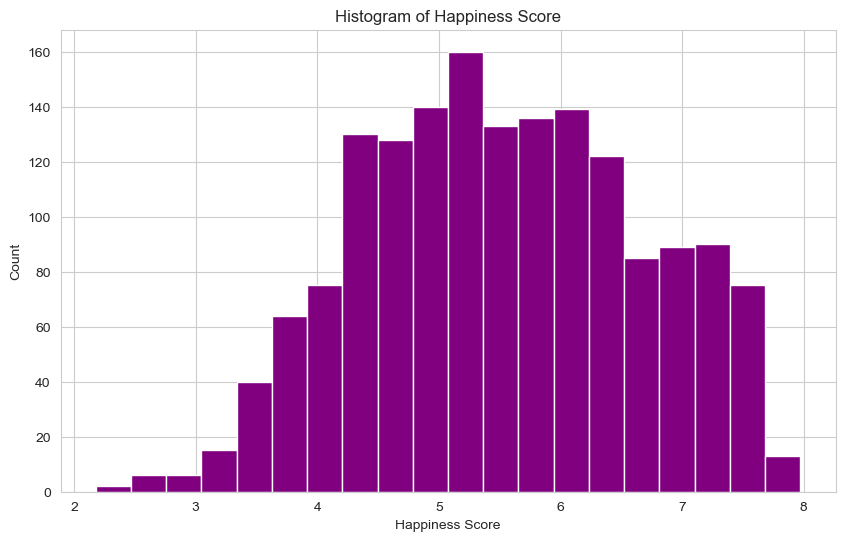

In [9]:
# histogram of happiness score

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

plt.figure(figsize=(10,6))
plt.hist(data['Happiness Score'], bins=20, color='purple')
plt.xlabel('Happiness Score')
plt.ylabel('Count')
plt.title('Histogram of Happiness Score')

In [11]:
# add a column to indicate the happiness emoji
def happiness_emoji(x):
    if x >= 6:
        return '🥰'
    elif x >= 4.5:
        return '🤖'
    else:
        return '🤢'
    
data['emoji'] = data['Happiness Score'].apply(happiness_emoji)
data.head()

,Unnamed: 0,Country,year,Happiness Score,Log GDP per capita,Social support,Health,Freedom to make life choices,Generosity,Corruption,...,Confidence in national government,continent,Country Code,Time Code,CO2 emissions,Population,Unemployment,Children out of school,Adjusted net national income,emoji
0,0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,...,0.612072,Asia,AFG,YR2008,3559.999943,26427199.0,2.49,NaN,NaN,🤢
1,1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,...,0.611545,Asia,AFG,YR2009,4880.000114,27385307.0,NaN,NaN,1.129747e+10,🤢
2,2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,...,0.299357,Asia,AFG,YR2010,7110.000134,28189672.0,NaN,NaN,1.448363e+10,🤖
3,3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,...,0.307386,Asia,AFG,YR2011,8930.000305,29249157.0,NaN,NaN,1.626732e+10,🤢
4,4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,...,0.435440,Asia,AFG,YR2012,8079.999924,30466479.0,1.69,NaN,1.822551e+10,🤢


## Import Packages

In [12]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "plotly_mimetype+notebook_connected"

##  Choropleth With Animation

In [23]:
fig = px.scatter_geo(data, locations="Country Code", color="emoji", 
                     hover_name="Country", size="Happiness Score", animation_frame="year", 
                     projection="natural earth", title="World Happiness in 2008-2021",
                     size_max=1, text="emoji",
                     # Custom Legend Content
                     category_orders={"emoji": ["🥰", "🤖", "🤢"]},
                     # Custom Legend Item
                     hover_data={"Country": False, "continent": True, "year": True, "Happiness Score": True, "emoji": True, "Country Code": False},
                    )

# Annotation (explain the emoji)
fig.add_annotation(
    x=1.00,
    y=-0.10,
    xanchor="right",
    yanchor="bottom",
    xref="paper",
    yref="paper",
    text="🥰: Happy(score>=6)   🤖: Neural(6>score>=4.5)   🤢: Not Happy(score<4.5)",
    showarrow=False,
    font=dict(
        family="sans serif",
        size=14,
        color="black",
    ),
)

# Custom Emoji Size
fig.update_traces(
    textfont=dict(size=17,)
)

fig.update_layout(
    # Figure Size
    width=800,
    height=600,
    # Custom Map
    geo=dict(
        showframe=True,
        showcoastlines=True,
        showland=True,
        showocean=True,
        coastlinecolor="rgb(141,160,203)",
        landcolor="rgb(229, 196, 148)",
        oceancolor="rgb(179,205,227)",
        showcountries=True,
        countrycolor="rgb(179,179,179)",
        projection_type="natural earth",
    ),
    # Custom Legend
    showlegend = False,
    # Custom Title
    title=dict(
        text="World Happiness in 2008-2021",
        x=0.05,
        y=0.90,
        xanchor="left",
        yanchor="top",
        font=dict(
            family="sans serif",
            size=24,
            color="black",
        ),
    ),
    # Custom Font
    font=dict(
        size=14,
    ),
)

# SHOW
fig.show()

In [24]:
# download the plot
# fig.write_html("choropleth_withanimation.html")

### For Poster

In [17]:
# Plot the happiness score of each country in 2021

# filter the data
data_2021 = data[data["year"] == 2021]

# plot the average happiness score of each continent
fig = px.scatter_geo(data_2021, locations="Country Code", color="emoji",
                    hover_name="Country", text="emoji",
                    projection="natural earth", title="Happiness Score of Each Contient in 2021",
                    # Custom Legend Content
                    category_orders={"emoji": ["🥰", "🤖", "🤢"]},         
                    )

fig.add_annotation(
    x=1.00,
    y=-0.08,
    xanchor="right",
    yanchor="bottom",
    xref="paper",
    yref="paper",
    text="🥰: Happy(score>=6)   🤖: Neural(6>score>=4.5)   🤢: Not Happy(score<4.5)",
    showarrow=False,
    font=dict(
        family="sans serif",
        size=14,
        color="black",
    ),
)

fig.update_layout(
    # Figure Size
    width=1000,
    height=600,
    # Custom Map
    geo=dict(
        showframe=True,
        showcoastlines=True,
        showland=True,
        showocean=True,
        coastlinecolor="rgb(141,160,203)",
        landcolor="rgb(229, 196, 148)",
        oceancolor="rgb(179,205,227)",
        showcountries=True,
        countrycolor="rgb(179,179,179)",
        projection_type="natural earth",
    ),
    # Custom Legend
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.10,
        xanchor="right",
        x=1,
        title="Happiness Score",
        font = dict(
            family="sans serif",
            size=13,
            color="black")
    ),
    # Custom Title
    title=dict(
        text="Happiness Score of Each Continent in 2021",
        x=0.05,
        y=0.90,
        xanchor="left",
        yanchor="top",
        font=dict(
            family="sans serif",
            size=24,
            color="black",
        ),
    ),
    showlegend = False,
    font = dict(
        size = 16,)
)


In [16]:
# download the plot as svg
#import plotly.io as pio
#pio.write_image(fig, 'happiness_score_2021.svg')
#pio.write_image(fig, 'happiness_score_2021.png')
